In [1]:
from pymongo import MongoClient

In [50]:
from __future__ import print_function
import openpyxl


from collections import OrderedDict

import folium
import ggplot as gg
from ggplot import ggplot
from IPython.html.widgets import interact
import matplotlib.pyplot as plt
import mpld3
import numpy as np
import pandas as pd
from itertools import islice

%matplotlib inline
mpld3.enable_notebook()
#folium.initialize_notebook()

# axis_color = 'black'
axis_color = '#d0d0d0'

### Data processing

In [3]:
wb = openpyxl.load_workbook("data/Enerdata_Energy_Statistical_Yearbook_2016.xlsx")
wb.get_sheet_names()

['List of tables',
 'Total primary production',
 'Total balance of trade',
 'Total Energy Supply',
 'Energy Intensity of GDP',
 'Crude oil, NGL Production',
 'Crude oil, NGL Trade',
 'Crude oil, NGL Consumption',
 'Oil Products Production',
 'Oil products balance of trade',
 'Oil Products Consumption',
 'Natural gas production',
 'Natural gas balance of trade',
 'Natural Gas Consumption',
 'Coal and Lignite Production',
 'Coal and Lignite Trade',
 'Coal and Lignite Consumption',
 'Electricity production',
 'Electricity Balance of Trade',
 'Electricity Consumption',
 '  % Renewables in Electricity',
 ' % Wind Solar in Electricity',
 'CO2 Emissions',
 'CO2 Intensity',
 'Abbreviations and Glossary',
 'Geographical Coverage',
 'Sources']

In [4]:
total_pp = wb.get_sheet_by_name("Total primary production")

In [5]:
c = next(total_pp.columns)

In [6]:
for cell in c:
    print(cell.value)

Total primary production (Mtoe)
Back to list of tables
None
World
OECD
G7
BRICS
Europe
European Union
Belgium
Czech Rep.
France
Germany
Italy
Netherlands
Poland
Portugal
Romania
Spain
Sweden
United Kingdom
Norway
Turkey
CIS
Kazakhstan
Russia
Ukraine
Uzbekistan
America
North America
Canada
United States
Latin America
Argentina
Brazil
Chile
Colombia
Mexico
Venezuela
Asia
China
India
Indonesia
Japan
Malaysia
South Korea
Taiwan
Thailand
Pacific
Australia
New Zealand
Africa
Algeria
Egypt
Nigeria
South Africa
Middle-East
Iran
Kuwait
Saudi Arabia
United Arab Emirates
n.a. : non avalaible 
Source : 


In [7]:
columns = total_pp.columns
c0 = next(columns)
c1 = next(columns)
for cell in c1:
    print(cell.value)

None
None
1990
8817.292066
3444.2735780000003
2531.851674
2700.456322
1133.348496
955.0997530000001
13.035032
41.552001
111.94571300000001
190.130636
25.753112
60.560017
104.24243200000001
3.402543
40.807383
35.262654000000005
29.65907
208.006462
119.483105
25.520864000000003
1656.09751
90.977383
1296.0348040000001
126.607104
38.655288
2542.004974
1920.9426170000002
273.52946000000003
1647.413157
621.062357
48.428951999999995
104.42639
7.9288170000000004
48.181292
196.017402
144.828675
1693.23604
904.030475
281.42814500000003
168.540613
75.073133
48.82863
24.349711
10.649038000000001
26.580061
175.933953
157.418385
12.010486
676.719513
100.112749
54.861299
146.30394
114.536508
939.9515799999999
187.839802
50.378137
368.442595
110.202674
None
None


In [8]:
MONGODB_HOST = 'localhost'
MONGODB_PORT = 27017
DBS_NAME = 'world_energy'
COLLECTION_NAME = 'primary_production'

In [9]:
connection = MongoClient(MONGODB_HOST, MONGODB_PORT)
collection = connection[DBS_NAME][COLLECTION_NAME]

In [10]:
next(iter(c))

<Cell 'Total primary production'.A1>

In [11]:
c = iter(next(total_pp.columns))
for cell in c1:
    if cell.value:
        country = next(c)
        print("%s: %s" % (country.value, cell.value))
        collection.insert_one({"Country": country.value, "primary_production": cell.value})

Total primary production (Mtoe): 1990
Back to list of tables: 8817.292066
None: 3444.2735780000003
World: 2531.851674
OECD: 2700.456322
G7: 1133.348496
BRICS: 955.0997530000001
Europe: 13.035032
European Union: 41.552001
Belgium: 111.94571300000001
Czech Rep.: 190.130636
France: 25.753112
Germany: 60.560017
Italy: 104.24243200000001
Netherlands: 3.402543
Poland: 40.807383
Portugal: 35.262654000000005
Romania: 29.65907
Spain: 208.006462
Sweden: 119.483105
United Kingdom: 25.520864000000003
Norway: 1656.09751
Turkey: 90.977383
CIS: 1296.0348040000001
Kazakhstan: 126.607104
Russia: 38.655288
Ukraine: 2542.004974
Uzbekistan: 1920.9426170000002
America: 273.52946000000003
North America: 1647.413157
Canada: 621.062357
United States: 48.428951999999995
Latin America: 104.42639
Argentina: 7.9288170000000004
Brazil: 48.181292
Chile: 196.017402
Colombia: 144.828675
Mexico: 1693.23604
Venezuela: 904.030475
Asia: 281.42814500000003
China: 168.540613
India: 75.073133
Indonesia: 48.82863
Japan: 24.3

In [12]:
collection.find_one({"Country": "America"})

{'Country': 'America',
 '_id': ObjectId('58ec628a421aa9295e5eb15e'),
 'primary_production': 273.52946000000003}

In [153]:
data = total_pp.values
data = list(data)
title = list(total_pp.values)[0][0]

In [154]:
columns = data[2][1:]
columns

(1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 '2014 - 2015 (%/year)',
 '2000 - 2015 (%/year)')

In [155]:
data = data[3:]
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df = pd.DataFrame(data, index=idx, columns=columns)

In [156]:
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2014 - 2015 (%/year),2000 - 2015 (%/year)
World,8817.292066,8831.426794,8884.125518,8918.914823,9056.847432,9243.685078,9475.358816,9592.300811,9715.295905,9719.336333,...,12386.760598,12263.015360,12793.612085,13164.702704,13341.704524,13591.887746,13778.903783,13887.116011,0.785347,2.194624
OECD,3444.273578,3473.049583,3496.906504,3492.792620,3611.973654,3672.827818,3773.375761,3801.136301,3818.120304,3790.624653,...,3866.854301,3798.407363,3878.408426,3856.037696,3877.945219,3990.026740,4113.637418,4128.175751,0.353418,0.496347
G7,2531.851674,2529.537937,2542.949785,2526.845240,2632.195889,2662.148394,2708.060141,2714.681834,2733.071089,2712.850653,...,2659.266100,2609.914551,2660.899983,2663.742710,2661.164448,2748.707962,2868.677834,2909.408674,1.419847,0.472460
BRICS,2700.456322,2642.168771,2584.672438,2547.102514,2557.084747,2604.477681,2643.321731,2626.149589,2641.961227,2668.562440,...,4141.378921,4175.080399,4445.567230,4686.316738,4738.656771,4850.247419,4934.278913,5016.348841,1.663261,4.053454
Europe,1133.348496,1133.001735,1135.295506,1146.069344,1174.934195,1206.095445,1261.610434,1257.611170,1225.662226,1227.040486,...,1144.996057,1106.701789,1115.499027,1076.371582,1072.900280,1058.222772,1034.417440,1040.080071,0.547422,-1.151341
European Union,955.099753,944.414438,931.594636,935.180350,951.383350,966.273744,998.353100,986.441532,958.812444,959.544086,...,856.113608,820.763055,836.606762,805.906779,800.067502,793.250617,770.403120,763.655819,-0.875814,-1.451677
Belgium,13.035032,12.921057,12.679260,12.008510,11.589174,11.870380,12.319165,13.344168,13.040352,13.851624,...,14.224925,14.904178,15.553498,16.143168,14.207204,14.911907,12.753738,10.856239,-14.877983,-1.524592
Czech Rep.,41.552001,39.186132,36.288196,35.754565,33.304349,32.448253,33.122901,33.443971,31.496143,28.668809,...,32.838200,31.245498,31.624393,32.172386,32.620006,29.998991,28.627472,27.276806,-4.718076,-0.761460
France,111.945713,118.565443,120.234021,126.444077,123.814683,127.881582,131.802900,128.743634,125.424283,127.146689,...,136.422242,128.828032,135.806347,135.961768,134.511948,136.218085,137.765930,138.151503,0.279875,0.371992
Germany,190.130636,168.761901,163.572741,152.712457,145.310464,144.947446,143.216583,144.839985,136.911608,137.831117,...,132.728584,126.473016,128.750594,122.694707,122.718110,120.526377,117.632795,120.638651,2.555287,-0.778300


In [165]:
countries_df = df.ix[countries_names].dropna(how="any")
countries_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2014 - 2015 (%/year),2000 - 2015 (%/year)
United Arab Emirates,110.202674,127.291886,133.966319,131.291312,133.570659,137.036872,142.069845,147.200984,150.940993,142.755072,...,185.571930,167.763148,174.173584,187.930461,194.359399,201.677469,204.156991,215.326453,5.471016,2.153952
Argentina,48.428952,50.228744,54.334610,57.140763,62.438018,67.138228,72.589379,76.804605,79.548296,80.516173,...,82.512167,81.078867,79.521730,77.265024,75.219700,71.439991,71.813378,72.850213,1.443791,-0.858411
Australia,157.418385,166.896825,171.473606,174.265288,172.876399,186.896552,189.761513,201.124638,216.590003,213.682421,...,286.796351,295.341646,310.744559,299.603856,315.778757,343.914031,365.297671,354.636928,-2.918371,2.819533
Belgium,13.035032,12.921057,12.679260,12.008510,11.589174,11.870380,12.319165,13.344168,13.040352,13.851624,...,14.224925,14.904178,15.553498,16.143168,14.207204,14.911907,12.753738,10.856239,-14.877983,-1.524592
Brazil,104.426390,105.017217,104.991470,105.907911,110.959911,112.323752,118.883402,126.602118,133.733805,141.628468,...,228.805630,231.286815,247.331549,250.028624,252.746297,253.755161,267.167061,280.186009,4.872961,4.355386
Canada,273.529460,284.913468,294.132974,315.956638,338.580200,349.020647,358.518094,365.281761,367.777288,366.852301,...,405.298986,388.792522,394.788525,407.199579,416.394630,434.176089,456.311311,456.365885,0.011960,1.322242
Chile,7.928817,8.349638,8.631508,8.231570,8.317267,8.303658,8.330793,8.364261,8.108323,7.959366,...,9.726524,10.206554,9.220187,9.878568,13.028320,14.981594,15.663605,13.943405,-10.982146,3.288603
China,904.030475,909.944385,926.381856,958.123370,1014.517574,1064.606905,1091.030457,1079.780620,1080.283115,1075.474028,...,2051.744797,2112.809006,2258.883283,2469.656283,2491.143730,2567.410466,2623.894703,2640.316608,0.625860,5.748687
Colombia,48.181292,46.351154,47.877525,48.557422,50.425206,59.243699,64.836673,66.729941,72.707093,75.551020,...,92.621993,98.211010,105.935129,120.367560,124.531820,125.555413,126.271790,124.619231,-1.308732,3.693227
Czech Rep.,41.552001,39.186132,36.288196,35.754565,33.304349,32.448253,33.122901,33.443971,31.496143,28.668809,...,32.838200,31.245498,31.624393,32.172386,32.620006,29.998991,28.627472,27.276806,-4.718076,-0.761460


In [200]:
help(df.plot)

Help on FramePlotMethods in module pandas.tools.plotting object:

class FramePlotMethods(BasePlotMethods)
 |  DataFrame plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> df.plot.line()
 |  >>> df.plot.scatter('x', 'y')
 |  >>> df.plot.hexbin()
 |  
 |  These plotting methods can also be accessed by calling the accessor as a
 |  method with the ``kind`` argument:
 |  ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
 |  
 |  Method resolution order:
 |      FramePlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr

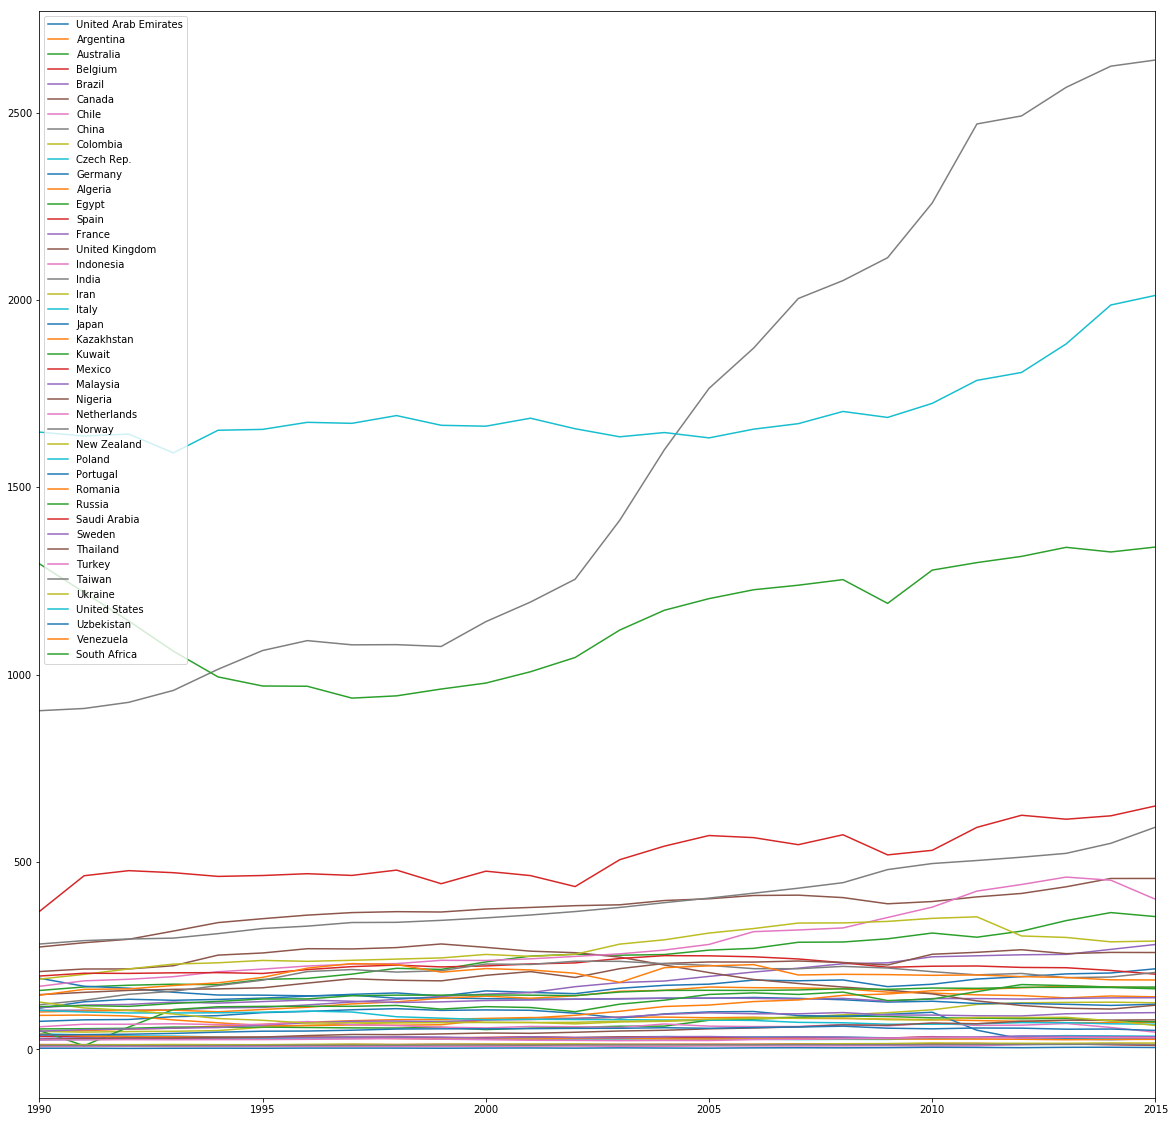

In [203]:
countries_df.iloc[:, :-2].T.plot(figsize=(20,20))

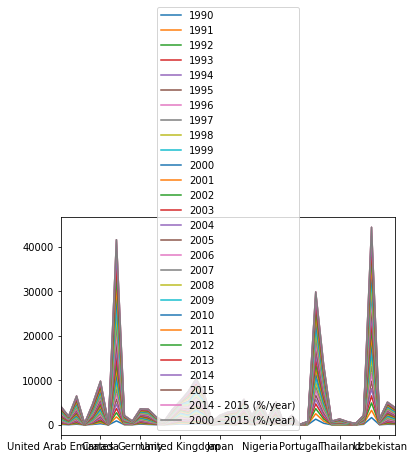

In [168]:
plt.figure(); countries_df.cumsum(axis=1).plot();

In [158]:
countries_df["names"] = countries_df.index

In [99]:
countries_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,names
United Arab Emirates,110.202674,127.291886,133.966319,131.291312,133.570659,137.036872,142.069845,147.200984,150.940993,142.755072,...,167.763148,174.173584,187.930461,194.359399,201.677469,204.156991,215.326453,5.47102,2.15395,United Arab Emirates
Argentina,48.428952,50.228744,54.334610,57.140763,62.438018,67.138228,72.589379,76.804605,79.548296,80.516173,...,81.078867,79.521730,77.265024,75.219700,71.439991,71.813378,72.850213,1.44379,-0.858411,Argentina
Australia,157.418385,166.896825,171.473606,174.265288,172.876399,186.896552,189.761513,201.124638,216.590003,213.682421,...,295.341646,310.744559,299.603856,315.778757,343.914031,365.297671,354.636928,-2.91837,2.81953,Australia
Belgium,13.035032,12.921057,12.679260,12.008510,11.589174,11.870380,12.319165,13.344168,13.040352,13.851624,...,14.904178,15.553498,16.143168,14.207204,14.911907,12.753738,10.856239,-14.878,-1.52459,Belgium
Brazil,104.426390,105.017217,104.991470,105.907911,110.959911,112.323752,118.883402,126.602118,133.733805,141.628468,...,231.286815,247.331549,250.028624,252.746297,253.755161,267.167061,280.186009,4.87296,4.35539,Brazil
Canada,273.529460,284.913468,294.132974,315.956638,338.580200,349.020647,358.518094,365.281761,367.777288,366.852301,...,388.792522,394.788525,407.199579,416.394630,434.176089,456.311311,456.365885,0.0119598,1.32224,Canada
Chile,7.928817,8.349638,8.631508,8.231570,8.317267,8.303658,8.330793,8.364261,8.108323,7.959366,...,10.206554,9.220187,9.878568,13.028320,14.981594,15.663605,13.943405,-10.9821,3.2886,Chile
China,904.030475,909.944385,926.381856,958.123370,1014.517574,1064.606905,1091.030457,1079.780620,1080.283115,1075.474028,...,2112.809006,2258.883283,2469.656283,2491.143730,2567.410466,2623.894703,2640.316608,0.62586,5.74869,China
Colombia,48.181292,46.351154,47.877525,48.557422,50.425206,59.243699,64.836673,66.729941,72.707093,75.551020,...,98.211010,105.935129,120.367560,124.531820,125.555413,126.271790,124.619231,-1.30873,3.69323,Colombia
Czech Rep.,41.552001,39.186132,36.288196,35.754565,33.304349,32.448253,33.122901,33.443971,31.496143,28.668809,...,31.245498,31.624393,32.172386,32.620006,29.998991,28.627472,27.276806,-4.71808,-0.76146,Czech Rep.


In [135]:
countries_df.loc[["India", "Brazil"]]

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,names
India,281.428145,290.501484,294.807156,297.178704,309.120075,322.845321,329.129929,338.804621,339.315589,344.601808,...,480.036879,496.208654,504.260919,513.131469,523.386514,550.179774,593.188654,7.81724,3.55653,India
Brazil,104.426390,105.017217,104.991470,105.907911,110.959911,112.323752,118.883402,126.602118,133.733805,141.628468,...,231.286815,247.331549,250.028624,252.746297,253.755161,267.167061,280.186009,4.87296,4.35539,Brazil


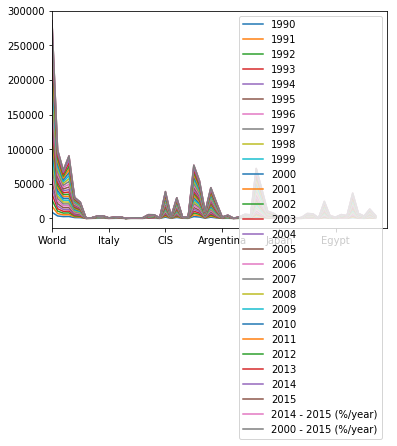

### Maps

In [100]:
map = folium.Map(location=[48, -102], zoom_start=2)

In [101]:
map.choropleth(geo_path=r'geojson/countries.json', data=countries_df, columns=["names", 1], 
               key_on='feature.properties.name',
              fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2)

In [103]:
map.save("total_pp.html")

In [102]:
map

In [40]:
import json
countries_geojson = json.load(open("geojson/countries.json"))

In [41]:
countries_names = [feature["properties"]["name"] for feature in countries_geojson["features"]]
countries_names

['Afghanistan',
 'Angola',
 'Albania',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antarctica',
 'Fr. S. Antarctic Lands',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahamas',
 'Bosnia and Herz.',
 'Belarus',
 'Belize',
 'Bolivia',
 'Brazil',
 'Brunei',
 'Bhutan',
 'Botswana',
 'Central African Rep.',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 "Côte d'Ivoire",
 'Cameroon',
 'Dem. Rep. Congo',
 'Congo',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'N. Cyprus',
 'Cyprus',
 'Czech Rep.',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominican Rep.',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Falkland Is.',
 'France',
 'Gabon',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Gambia',
 'Guinea-Bissau',
 'Eq. Guinea',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guyana',
 'Honduras',
 'Croatia',
 'Haiti',
 'Hungary',
 'Indonesia',
 'India',
 'Ireland',

In [43]:
for cell in c0:
    if cell.value in countries_names:
        print(cell.value)

Belgium
Czech Rep.
France
Germany
Italy
Netherlands
Poland
Portugal
Romania
Spain
Sweden
United Kingdom
Norway
Turkey
Kazakhstan
Russia
Ukraine
Uzbekistan
Canada
United States
Argentina
Brazil
Chile
Colombia
Mexico
Venezuela
China
India
Indonesia
Japan
Malaysia
Taiwan
Thailand
Australia
New Zealand
Algeria
Egypt
Nigeria
South Africa
Iran
Kuwait
Saudi Arabia
United Arab Emirates


In [105]:
s = pd.Series([1,3,4,np.nan, 6, 7,9])

In [106]:
dates = pd.date_range('20130101', periods=7)

In [112]:
dates
df = pd.DataFrame(np.random.randn(7,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.293673,-0.993225,2.103671,-0.483395
2013-01-02,0.275867,0.417918,-0.444787,0.354681
2013-01-03,0.828054,-0.107883,0.541561,0.831631
2013-01-04,-0.185679,0.416775,-0.793124,1.545968
2013-01-05,-1.140328,0.673687,0.919671,0.453376
2013-01-06,1.077564,-0.861545,-1.797291,1.084355
2013-01-07,0.376447,-0.903624,0.706763,0.211811


In [115]:
df2 = pd.DataFrame({
    "A": 1.,
    "B": pd.Timestamp('20130102'),
    "C": pd.Series(1,index=list(range(4)), dtype="float32"),
    "D": np.array([3]*4,dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo"
})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [116]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [118]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [119]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [120]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']], dtype=object)

In [121]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-07 00:00:00
A,-0.293673,0.275867,0.828054,-0.185679,-1.140328,1.077564,0.376447
B,-0.993225,0.417918,-0.107883,0.416775,0.673687,-0.861545,-0.903624
C,2.103671,-0.444787,0.541561,-0.793124,0.919671,-1.797291,0.706763
D,-0.483395,0.354681,0.831631,1.545968,0.453376,1.084355,0.211811


In [126]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.483395,2.103671,-0.993225,-0.293673
2013-01-02,0.354681,-0.444787,0.417918,0.275867
2013-01-03,0.831631,0.541561,-0.107883,0.828054
2013-01-04,1.545968,-0.793124,0.416775,-0.185679
2013-01-05,0.453376,0.919671,0.673687,-1.140328
2013-01-06,1.084355,-1.797291,-0.861545,1.077564
2013-01-07,0.211811,0.706763,-0.903624,0.376447


In [127]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-0.293673,-0.993225,2.103671,-0.483395
2013-01-07,0.376447,-0.903624,0.706763,0.211811
2013-01-06,1.077564,-0.861545,-1.797291,1.084355
2013-01-03,0.828054,-0.107883,0.541561,0.831631
2013-01-04,-0.185679,0.416775,-0.793124,1.545968
2013-01-02,0.275867,0.417918,-0.444787,0.354681
2013-01-05,-1.140328,0.673687,0.919671,0.453376


In [128]:
df['A']

2013-01-01   -0.293673
2013-01-02    0.275867
2013-01-03    0.828054
2013-01-04   -0.185679
2013-01-05   -1.140328
2013-01-06    1.077564
2013-01-07    0.376447
Freq: D, Name: A, dtype: float64

In [129]:
df.head(3)

,A,B,C,D
2013-01-01,-0.293673,-0.993225,2.103671,-0.483395
2013-01-02,0.275867,0.417918,-0.444787,0.354681
2013-01-03,0.828054,-0.107883,0.541561,0.831631


In [130]:
df[0:3]

,A,B,C,D
2013-01-01,-0.293673,-0.993225,2.103671,-0.483395
2013-01-02,0.275867,0.417918,-0.444787,0.354681
2013-01-03,0.828054,-0.107883,0.541561,0.831631


In [131]:
df.loc[dates[1]]

A    0.275867
B    0.417918
C   -0.444787
D    0.354681
Name: 2013-01-02 00:00:00, dtype: float64

In [132]:
df.loc[:, list('AB')]

,A,B
2013-01-01,-0.293673,-0.993225
2013-01-02,0.275867,0.417918
2013-01-03,0.828054,-0.107883
2013-01-04,-0.185679,0.416775
2013-01-05,-1.140328,0.673687
2013-01-06,1.077564,-0.861545
2013-01-07,0.376447,-0.903624


['A', 'B']